# Uber Trips

In [1]:
import sys
sys.path.insert(0, r"..//..//")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hotstepper import Steps

import warnings
warnings.filterwarnings("ignore")

Read the data from a csv into a dataframe so we can have a quick look at what we have.

In [2]:
df_uber = pd.read_csv(r'..//..//data//taxi data.csv',parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])
#df_uber['tpep_pickup_datetime'] = df_uber.tpep_pickup_datetime.apply(lambda x: x.tz_localize(None))
#df_uber['tpep_dropoff_datetime'] = df_uber.tpep_dropoff_datetime.apply(lambda x: x.tz_localize(None))
df_uber.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount
0,2,2015-01-15 19:05:39+00:00,2015-01-15 19:23:42+00:00,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,3.25,17.05
1,2,2015-01-15 19:05:39+00:00,2015-01-15 19:32:00+00:00,1,2.38,-73.976425,40.739811,-73.983978,40.757889,16.5,4.38,22.68
2,2,2015-01-15 19:05:40+00:00,2015-01-15 19:21:00+00:00,5,2.83,-73.968704,40.754246,-73.955124,40.786858,12.5,0.00,14.30
3,2,2015-01-15 19:05:40+00:00,2015-01-15 19:28:18+00:00,5,8.33,-73.863060,40.769581,-73.952713,40.785782,26.0,8.08,41.21
4,2,2015-01-15 19:05:41+00:00,2015-01-15 19:20:36+00:00,1,2.37,-73.945541,40.779423,-73.980850,40.786083,11.5,0.00,13.30


<AxesSubplot:>

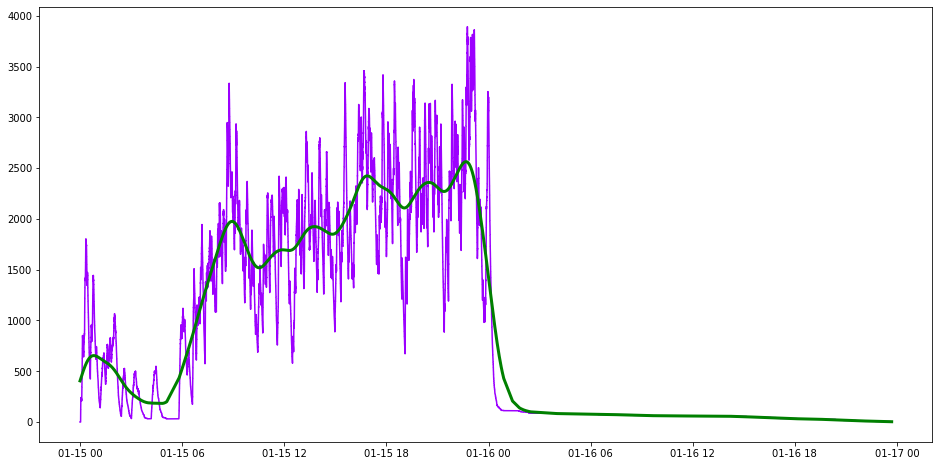

In [3]:
uber_steps = Steps.read_dataframe(df_uber,'tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count')
ax = uber_steps.plot()
uber_steps.smooth_plot(ax=ax,color='g',linewidth=3)

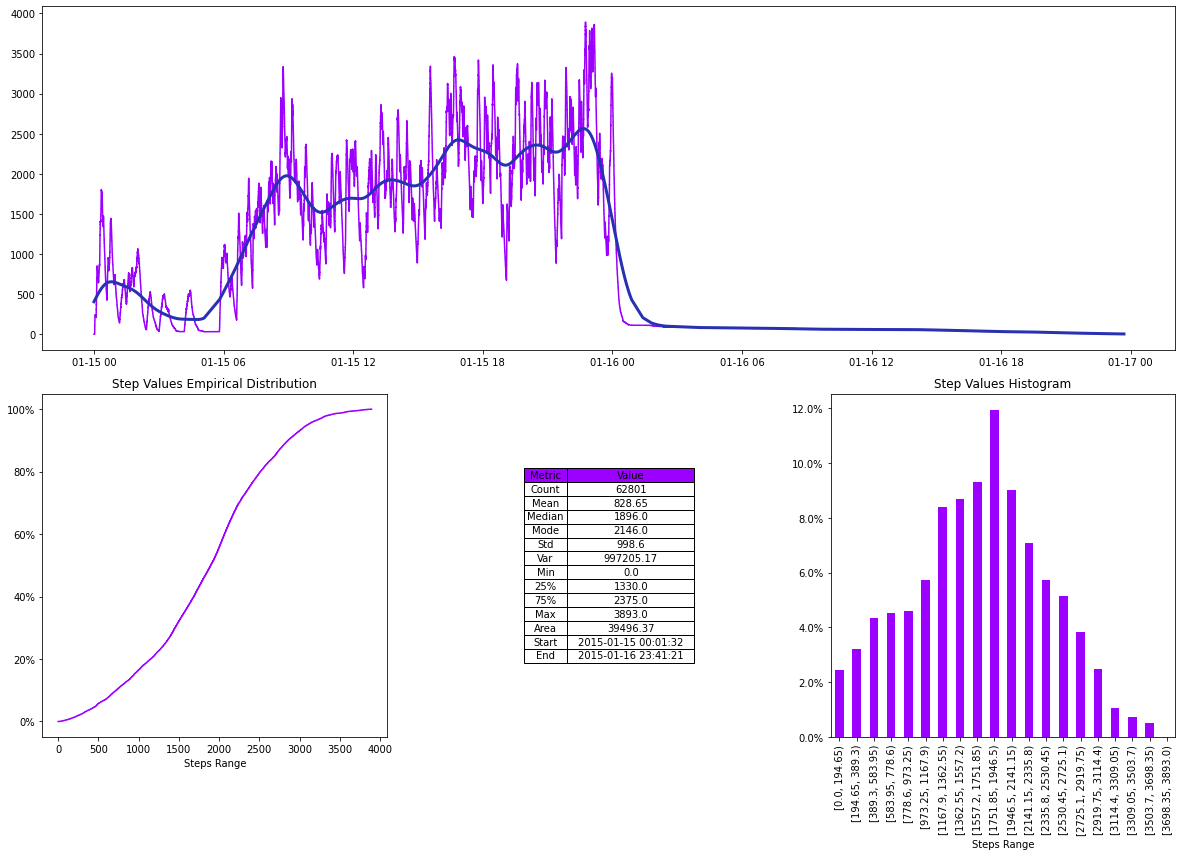

In [4]:
uber_steps.summary();

In [5]:
df_start = df_uber.loc[df_uber.tpep_pickup_datetime==df_uber.tpep_pickup_datetime.min()]
print(f"Pandas direct {df_start['passenger_count'].sum()}")
print(f"Step function at first {uber_steps(uber_steps.first())[0]}")

Pandas direct 8
Step function at first 8.0


<AxesSubplot:title={'center':'Steps Partial Autocorrelation for Lags = 10'}, xlabel='Lag'>

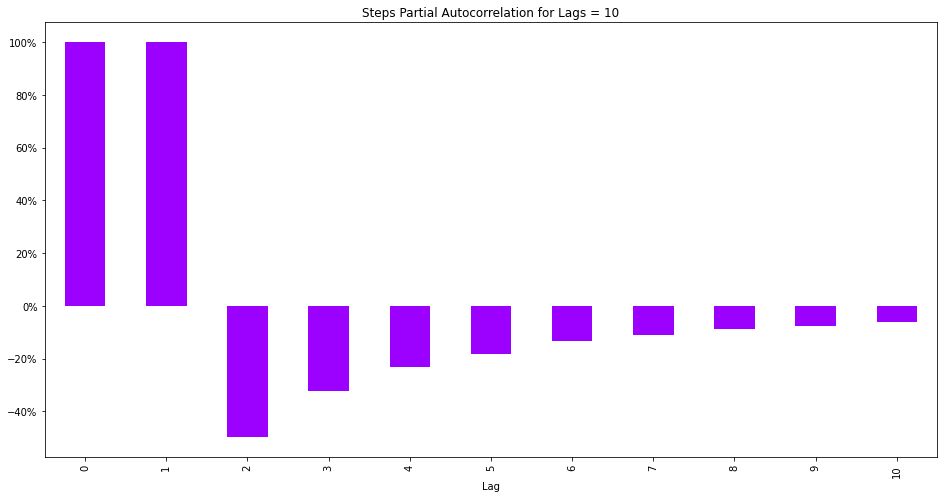

In [6]:
uber_steps.pacf_plot()
